# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Ensambles</center>
### <center> Práctica Bagging : Random Forest Clasificación </center>

### Links interesantes
 * https://pandas.pydata.org
 * https://scikit-learn.org
 * https://matplotlib.org/
 * https://seaborn.pydata.org/
 * https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180
 * https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler
 * https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning
 * https://towardsdatascience.com/decision-tree-classifier-and-cost-computation-pruning-using-python-b93a0985ea77

### Repaso Teórico Ensambles Bagging

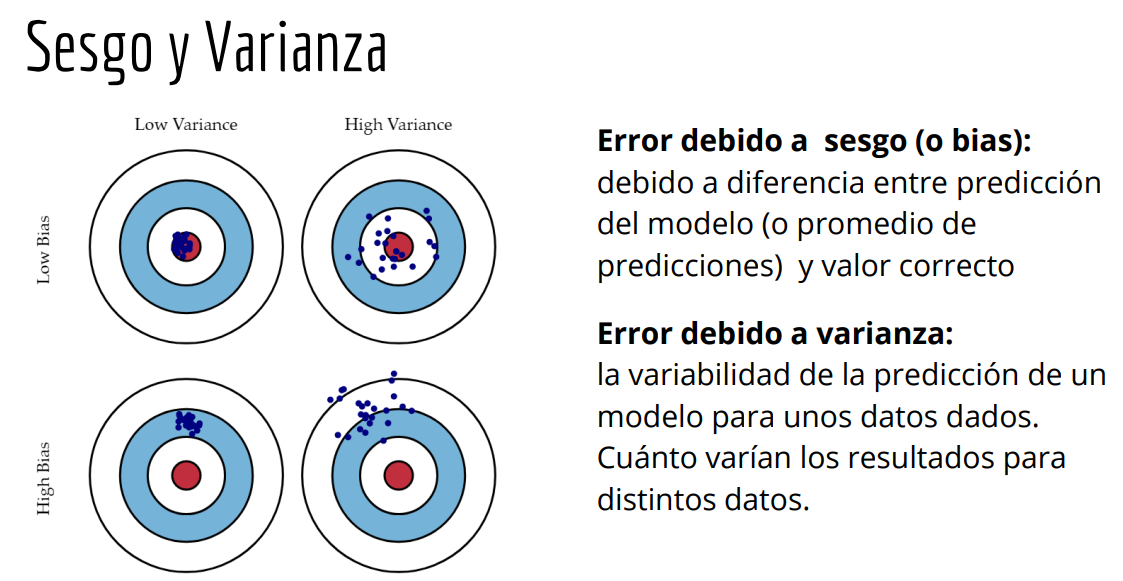

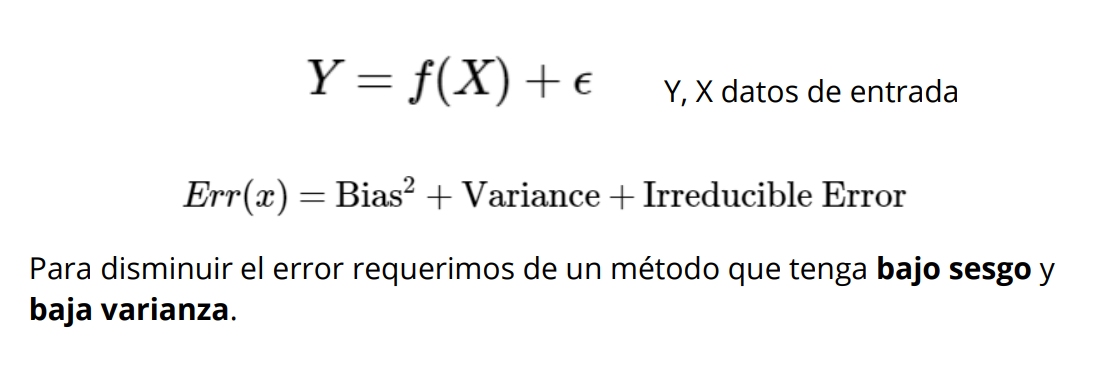

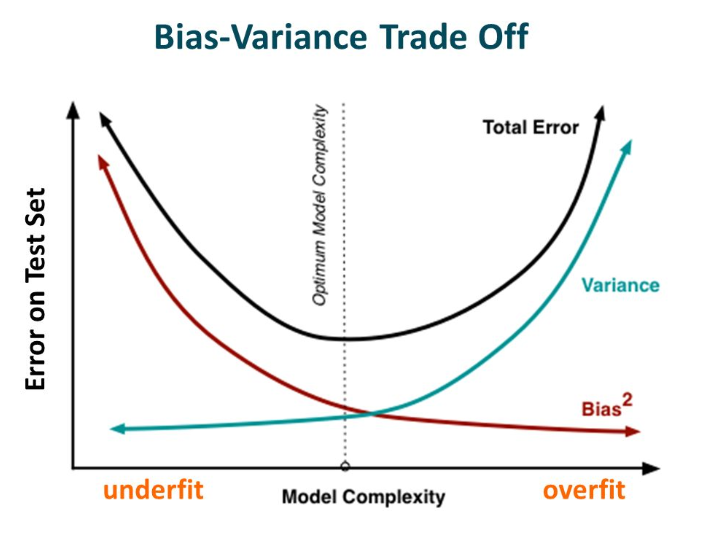

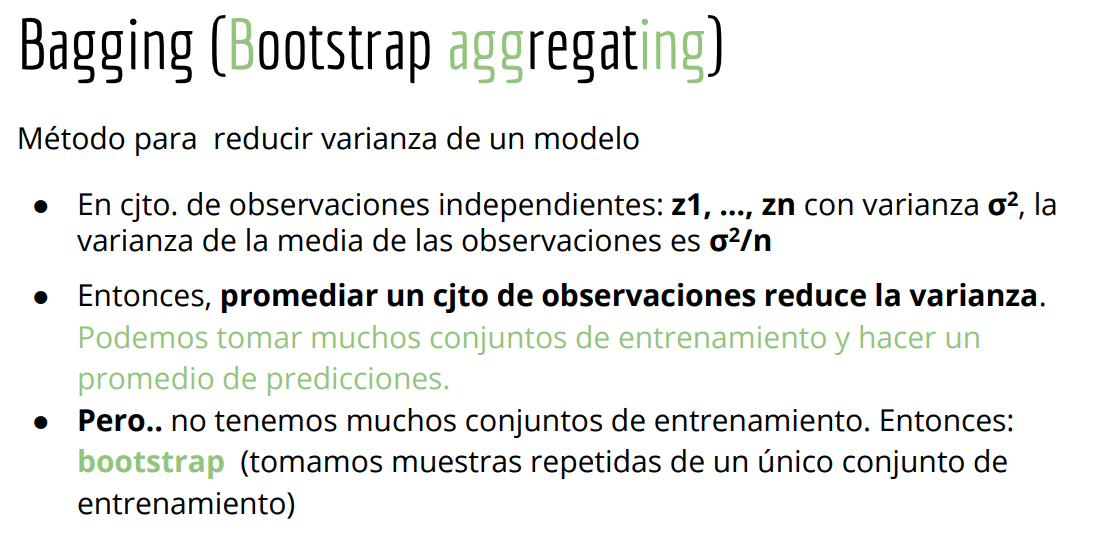

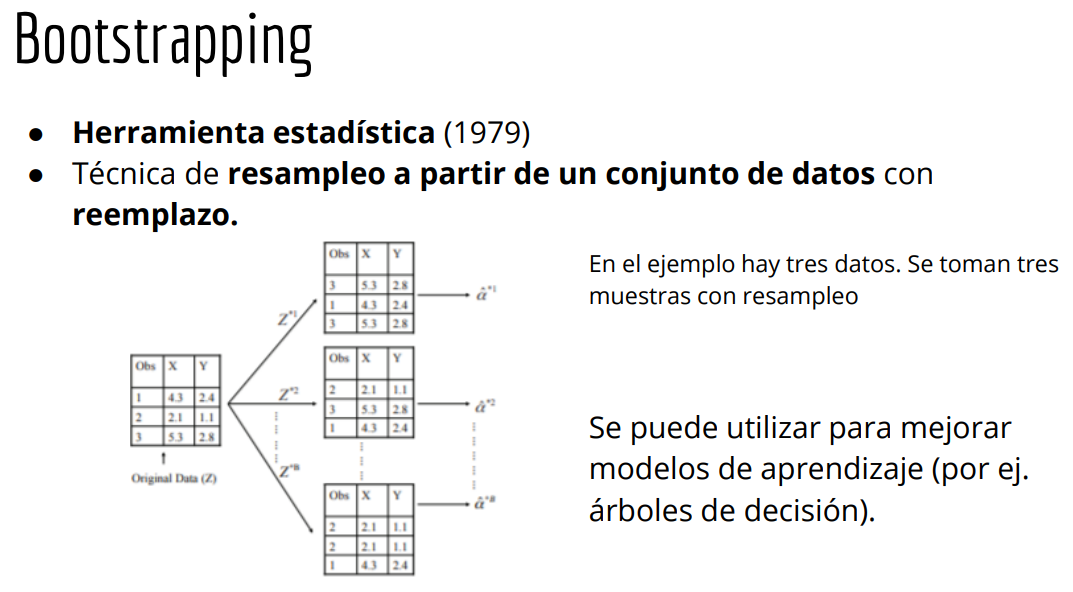

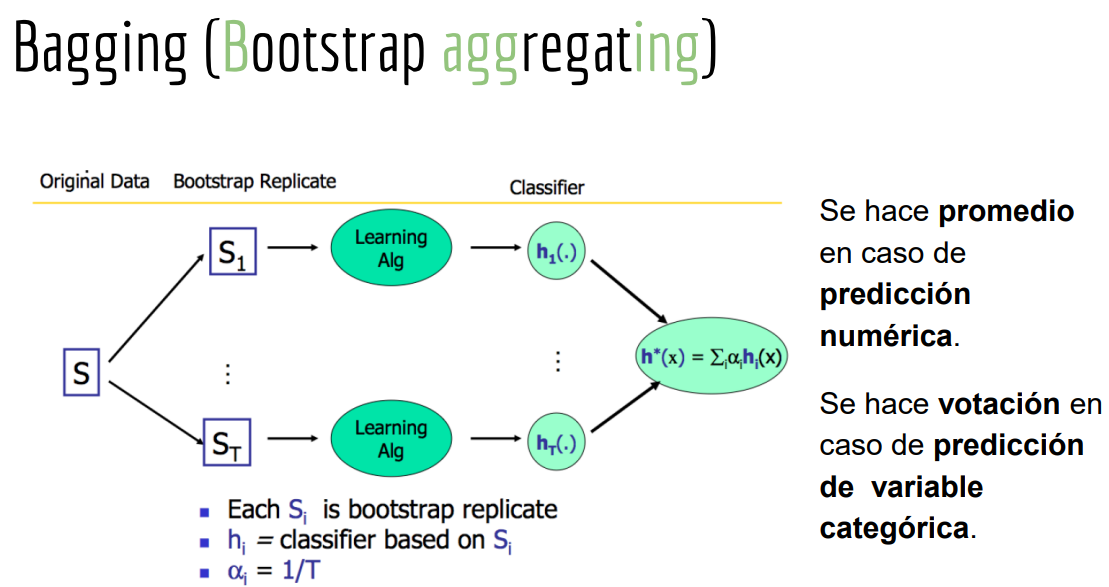

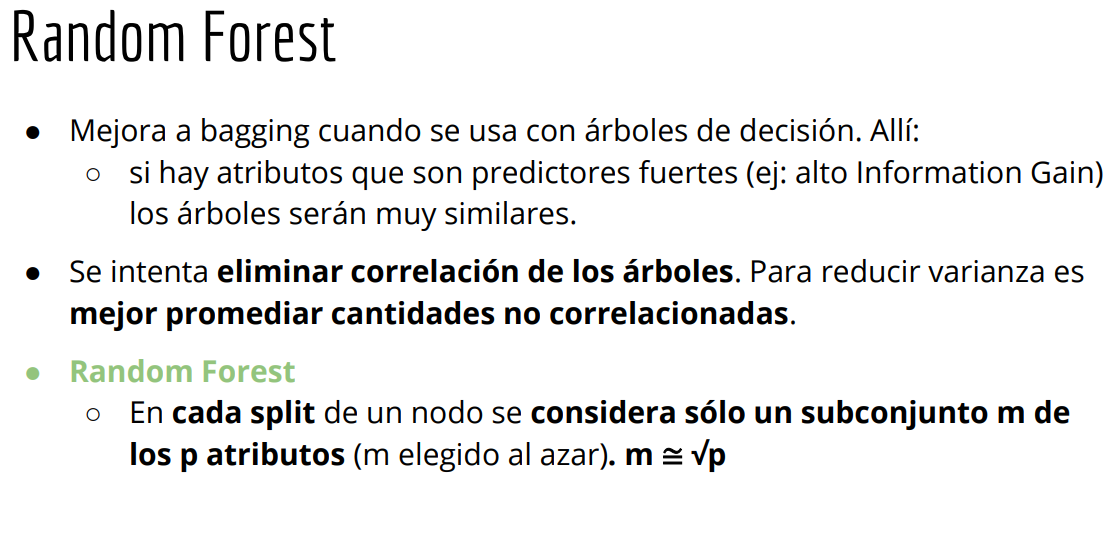

### Importamos todas las librerías que vamos a necesitar

In [2]:
!pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Cargamos el dataset sobre el cual vamos a trabajar

In [4]:
ds_titanic=pd.read_csv('./datasets/ds_titanic.csv')
ds_trabajo=ds_titanic.copy()

### Análisis exploratorio

Listar la cantidad de filas y columnas que tiene el dataset

In [5]:
ds_trabajo.shape

(891, 12)

Este dataset contiene 891 filas y 12 columnas

Listar los nombres de las columnas del dataset

In [6]:
ds_trabajo.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<b>Descripción de los campos</b><br>
* PassengerId: Identificador del pasajero dentro de la tabla<br>
* Survived: Indica si el pasajero sobrevivió<br>
* Pclass: clase de pasajero primera(1), segunda (2) o tercera (3) <br>
* Name: Nombre del pasajero <br>
* Sex: Sexo del pasajero<br>
* Age: Edad<br>
* SibSp: Cantidad de hermanas/os o esposas/os a bordo<br>
* Parch: Cantidad de padres o hijos a bordo<br>
* Ticket: Número de ticket<br>
* Fare: Tarifa <br>
* Cabin: Cabina en la cual se encuentra alojado el pasajero<br>
* Embarked: Puerta de embarque<br>

Mostrar algunas filas del dataframe

In [7]:
ds_trabajo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



<font color='red'>TODO (tarea): </font>
<font color='red'> Un an&aacute;lisis exploratorio de este dataset lo realizamos en clases anteriores, ahora te proponemos continuar esta tarea </font>    

### Preprocesamiento

#### Selección de atributos

Eliminamos algunas columnas que decidimos no utilizar

In [8]:
columnas_eliminar=['PassengerId','Name',"Ticket"]
ds_trabajo.drop(columnas_eliminar, axis='columns', inplace=True)  #Elimina columna sobre el mismo dataframe
ds_trabajo.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked']

#### Datos nulos

Anlizamos la proporcion de datos nulos de cada atributo

In [9]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


<font color='blue'>Por esta vez vamos eliminar los valores faltantes. </font><br>
* Debido a la gran cantidad de datos nulos en la variable Cabin se decide eliminarla.<br>
* Para el resto de las variables con datos faltantes se eliminaran las filas que tengan valores nulos en alguna de ellas.

In [10]:
columnas_eliminar_NANs=['Cabin']
ds_trabajo.drop(columnas_eliminar_NANs, axis='columns', inplace=True)
ds_trabajo.columns.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [11]:
ds_trabajo=ds_trabajo.dropna()
ds_trabajo_limpio=ds_trabajo.copy()

Volvemos a listar la cantidad de Nans

In [12]:
filas_totales=ds_trabajo.shape[0]
print(ds_trabajo.isna().sum()/filas_totales*100)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64


In [13]:
ds_trabajo.shape

(712, 8)

<font color='red'>TODO (tarea): </font>
<font color='red'> probar dejando Nans en el dataset  </font>    

### Entrenamiento y Predicción

Continuamos trabajando con un dataset de 712 filas y 8 variables, hacemmos una división train-test

In [14]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y de test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [15]:
#Creo un clasificador árbol de decisión
tree_model = tree.DecisionTreeClassifier(max_depth = 10)

#Entreno el modelo
model = tree_model.fit(X = x_train, y = y_train) 

ValueError: ignored

<font color='blue'> Muchas veces para trabajar con determinados m&eacute;todos es necesario realizar transformaciones de variables.</font>
<font color='blue'> En este caso al utilizar esta implementaci&oacute;n de &aacute;rboles, y querer utilizar variables categ&oacute;ricas como variables predictoras, necesitamos realizar transformaciones sobre las mismas. </font>
<font color='blue'> </font>

In [16]:
#One hot encoding para variables categoricas
ds_trabajo = pd.get_dummies(ds_trabajo, columns=["Pclass","Sex","Embarked"], drop_first=True)
ds_trabajo.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


División Train - Test nuevamente

In [17]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo.drop(['Survived'], axis='columns', inplace=False)

#Creo un dataset con la variable target
ds_trabajo_y = ds_trabajo['Survived'].copy()

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, 
                                                    ds_trabajo_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) #semilla

In [18]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
52,49.0,1,0,76.7292,0,0,0,0,0
366,60.0,1,0,75.2500,0,0,0,0,0
802,11.0,1,2,120.0000,0,0,1,0,1
184,4.0,0,2,22.0250,0,1,0,0,1
71,16.0,5,2,46.9000,0,1,0,0,1


In [19]:
y_train.head()

52     1
366    1
802    1
184    1
71     0
Name: Survived, dtype: int64

#### Random Forest

Vamos a crear un ensamble de arboles de decisión construyendo un modelo Random Forest

El detalle de los hiperparámetros implementados en scikit learn se encuentra en el siguiente link:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Cada árbol se construye así:

* Dado que el número de casos en el conjunto 
de entrenamiento es N. Una muestra de esos N casos se toma aleatoriamente pero CON REEMPLAZO. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

* Si existen M varibles de entrada, un número m <M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

* Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda.
Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)

In [23]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1,
                             criterion="entropy", 
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

In [25]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [26]:
#Valores Reales
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [27]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


Text(33.0, 0.5, 'True')

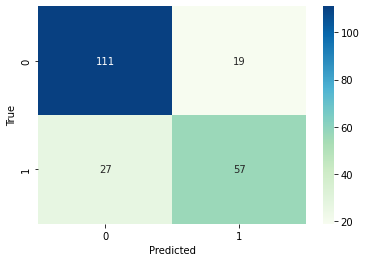

In [29]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [30]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.7850467289719626
Recall: 0.6785714285714286
f1 score: 0.7124999999999999


#### Graficamos un árbol del RF

In [31]:
model.classes_

array([0, 1])

In [33]:
model.estimators_[48]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=546147920)

In [34]:
plt.figure(figsize=(100,100))

tree_plot_completo=tree.plot_tree(model.estimators_[48],
                                 feature_names=ds_trabajo_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Survived','Survived']) #model.classes_
plt.show(tree_plot_completo)

Output hidden; open in https://colab.research.google.com to view.

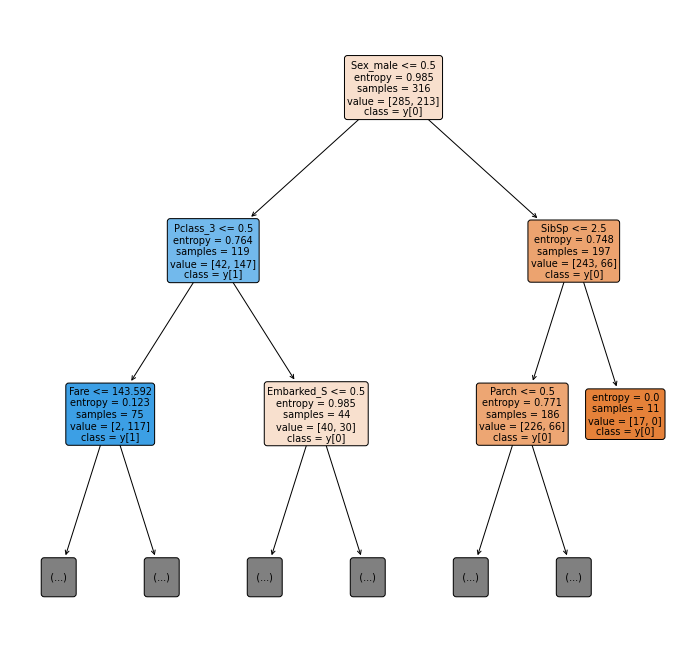

In [36]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model.estimators_[48],
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

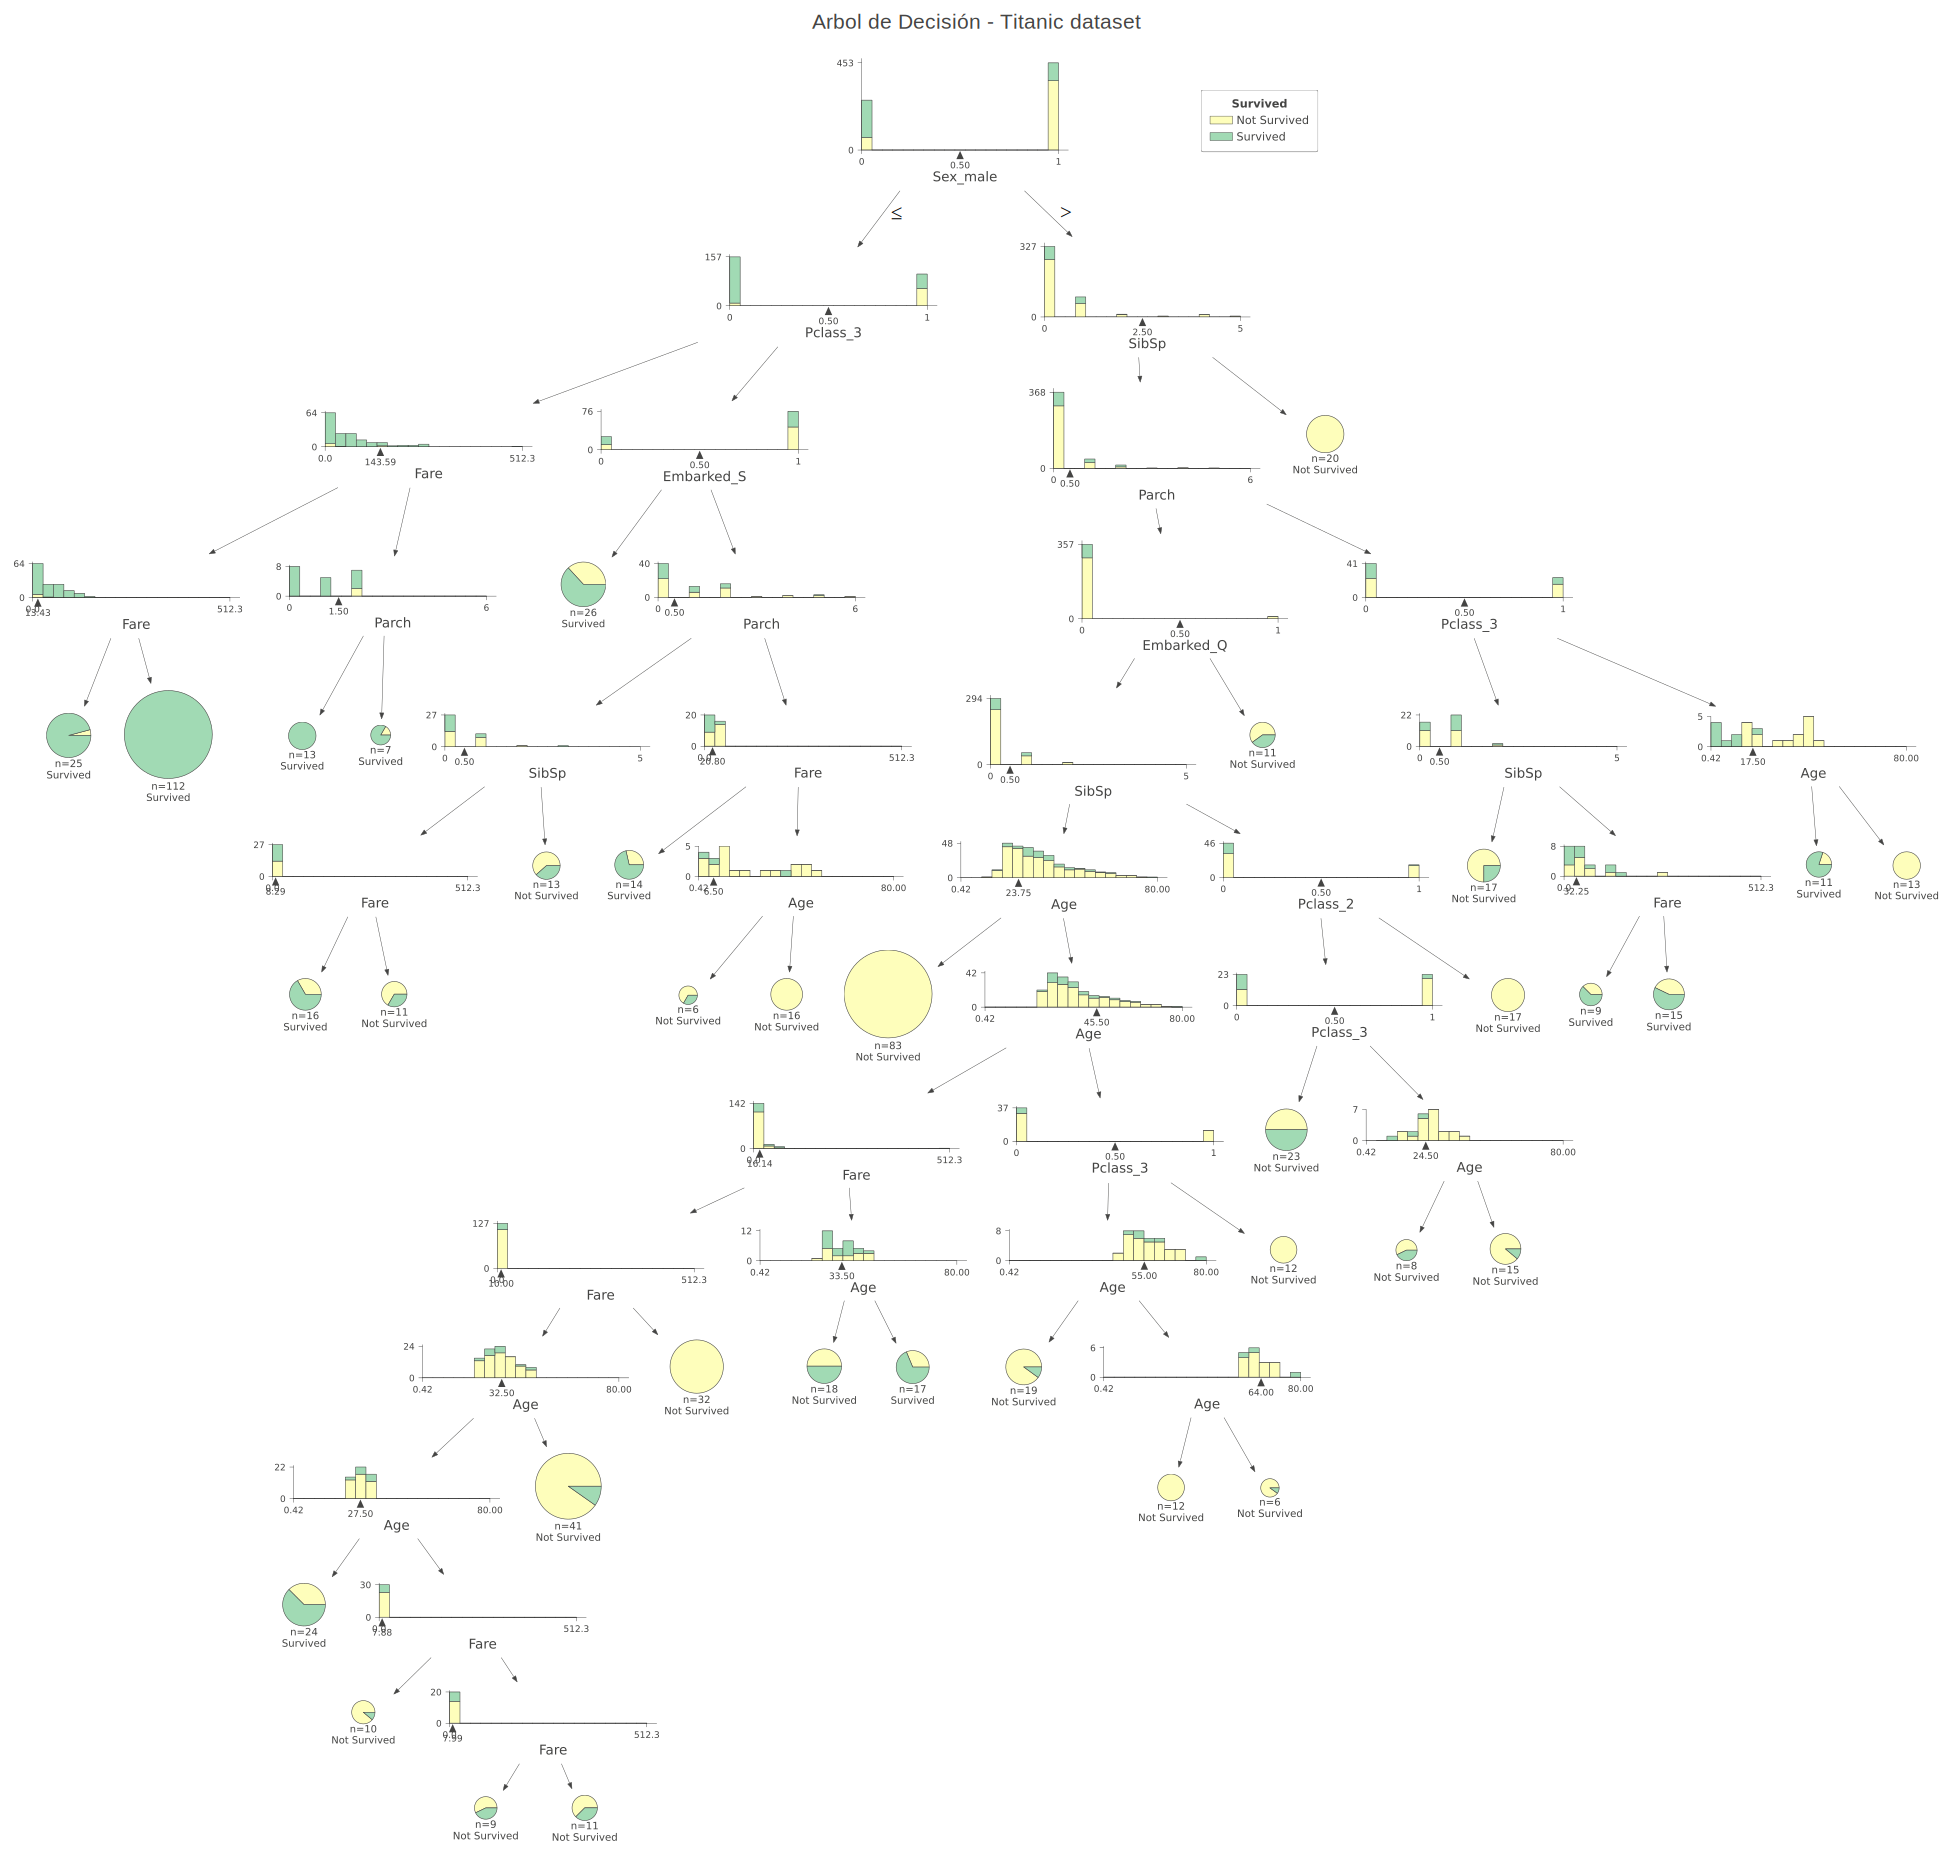

In [37]:
viz = dtreeviz.dtreeviz(
    model.estimators_[48],
    ds_trabajo_x,
    ds_trabajo_y,
    class_names=['Not Survived','Survived'], 
    title="Arbol de Decisión - Titanic dataset",
    target_name='Survived',
    feature_names=ds_trabajo_x.columns.to_list(),
    scale=1.5
)

display(viz)

#### Importancia de atributos

La documentación dice:

feature importances : ndarray of shape (nfeatures,)<br>
The higher, the more important the feature. <br>
The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. <br>
It is also known as the Gini importance.<br>

feature importances : ndarray of shape (nfeatures,)<br>
Cuanto más alto, más importante es la característica.<br>
La importancia de una característica se calcula como la reducción total (normalizada) del criterio aportado por esa característica.<br>
También se conoce como la importancia de Gini.<br>

In [38]:
sorted(list(zip(ds_trabajo_x.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('Sex_male', 0.4026870765763473),
 ('Fare', 0.18832229252646296),
 ('Age', 0.15335478747279882),
 ('Pclass_3', 0.11704347901433527),
 ('SibSp', 0.046534865320563175),
 ('Pclass_2', 0.03809553481129563),
 ('Parch', 0.036239146186703534),
 ('Embarked_S', 0.014088772131131128),
 ('Embarked_Q', 0.0036340459603623)]

#### Validación Cruzada


Busquemos hiperparametros con GridSearch CV

In [41]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }

#Probamos entrenando sólo con 1 métrica
gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = x_train, y = y_train)

In [66]:
gs_fit.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 50}

Veamos la mejor combinación de hiperparámetros

In [44]:
gs_fit.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 50}

¿Cuál fue la mejor métrica?

In [45]:
print("accuracy en entrenamiento con cv: "+str(gs_fit.best_score_))

accuracy en entrenamiento con cv: 0.8392525252525254


Predecimos utilizando el mejor modelo que obtuvimos en entrenamiento

In [46]:
#Obtenemos el mejor modelo
rf_cv_best=gs_fit.best_estimator_

#Predicción
y_pred_rf_cv_best = rf_cv_best.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       130
           1       0.75      0.67      0.70        84

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



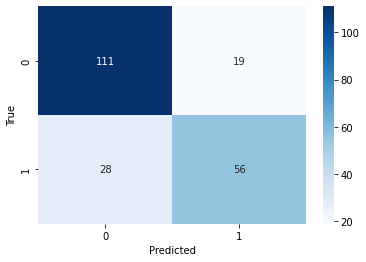

In [76]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_rf_cv_best)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_rf_cv_best))

In [49]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_rf_cv_best)
recall=recall_score(y_test,y_pred_rf_cv_best)
f1=f1_score(y_test,y_pred_rf_cv_best)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.780373831775701
Recall: 0.6666666666666666
f1 score: 0.7044025157232704


Probemos optimizar hiperparámetros considerando mas de una métrica

In [68]:
rf_cv = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], 
               "min_samples_leaf" : [1, 5, 10], 
               "min_samples_split" : [2, 4, 10, 12, 16], 
               "n_estimators": [10,20, 50] }

#Probamos entrenando con varias métricas

metricas=['accuracy','f1','roc_auc'] #'recall','precision'

gs_multimetrica = GridSearchCV(estimator=rf_cv, 
                               param_grid=param_grid, 
                               scoring=metricas, 
                               refit=False, 
                               cv=5, 
                               n_jobs=-1)
#Entrenamiento
gs_multimetrica_fit = gs_multimetrica.fit(X = x_train, y = y_train)

Grafiquemos los resultados de las métricas

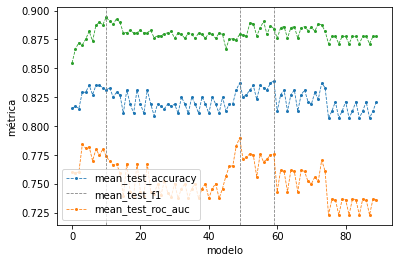

In [59]:
labels=[ key for key in gs_multimetrica_fit.cv_results_.keys() if("mean_test" in key)]

for k in labels:
    plt.plot(gs_multimetrica_fit.cv_results_[k],linestyle='--' , linewidth=0.8,marker='o',markersize=2)     
    x_linea=np.argmax(gs_multimetrica_fit.cv_results_[k])
    plt.axvline(x_linea,linestyle='--' ,linewidth=0.8,color='grey')
        
plt.xlabel("modelo", fontsize=10)
plt.ylabel("métrica", fontsize=10)
plt.legend(labels)
plt.show()

Realizamos una predicción

In [70]:
params_elegidos=gs_multimetrica_fit.cv_results_['params'][np.argmax(gs_multimetrica_fit.cv_results_['mean_test_accuracy'])]
params_elegidos

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 16,
 'n_estimators': 50}

In [72]:
#Creamos un clasificador RF
rfc_multimetrica = RandomForestClassifier(criterion= params_elegidos['criterion'], 
                                          min_samples_leaf= params_elegidos['min_samples_leaf'], 
                                          min_samples_split= params_elegidos['min_samples_split'], 
                                          n_estimators=params_elegidos['n_estimators'], 
                                          oob_score=True, random_state=2, n_jobs=-1)
#Entrenamos un modelo
model_rfc_multimetrica = rfc_multimetrica.fit(X = x_train, y = y_train)

#Hacemos una predicción
y_pred_model_rfc_multimetrica = model_rfc_multimetrica.predict(x_test)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.74      0.65      0.70        84

    accuracy                           0.78       214
   macro avg       0.77      0.75      0.76       214
weighted avg       0.77      0.78      0.77       214



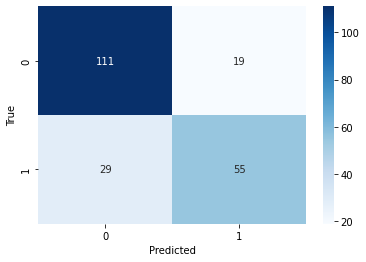

In [75]:
#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred_model_rfc_multimetrica)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_model_rfc_multimetrica))
